## EDA (Exploratory Data Analysis)

### Iris Flower dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


<b>Objective: </b>
1. Classify a new flower as belonging to one of the 3 classes given the 4 features.
2. Why use petal and sepal dimesion as feature?
3. Why do we not use 'color' as a feature?

In [3]:
dataset=sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# how many data points and features ?
dataset.shape

(150, 5)

In [5]:
# what are the name of the columns ?
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# How many data points for each class are present ?
dataset['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# iris is a balanced datase as the no. of data points for every class is equall.
# Models tend to bias toward the majority class, often predicting it almost exclusively while ignoring minority classes. This happens because the algorithm optimizes for overall accuracy.


In [8]:
# Check value counts
dataset['species'].value_counts()
dataset['species'].value_counts(normalize=True)  # As percentages

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

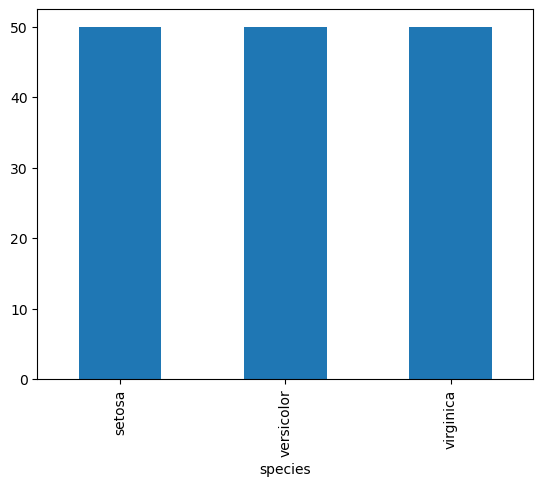

In [9]:
dataset['species'].value_counts().plot(kind='bar')
plt.show()

### 2-D Scatter Plot

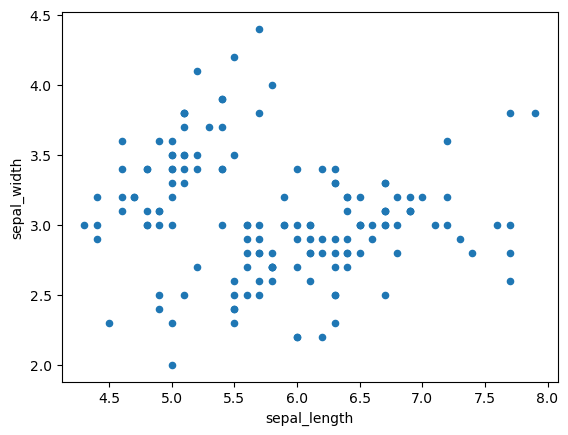

In [10]:
# Always understand the axis: labels and scale:
dataset.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

# cannot make sense out of it we color the points by their class-label/flower type.

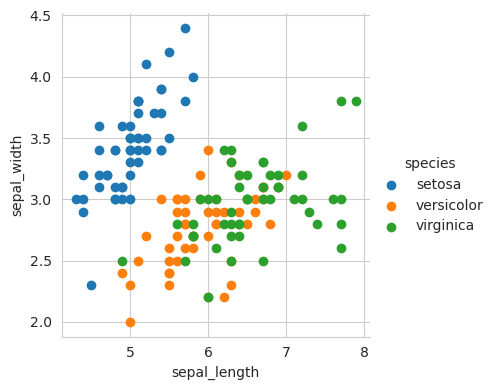

In [11]:
# visulaize data
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='species',height=4).map(plt.scatter,"sepal_length","sepal_width") \
.add_legend()
plt.show()

### Pair-plot

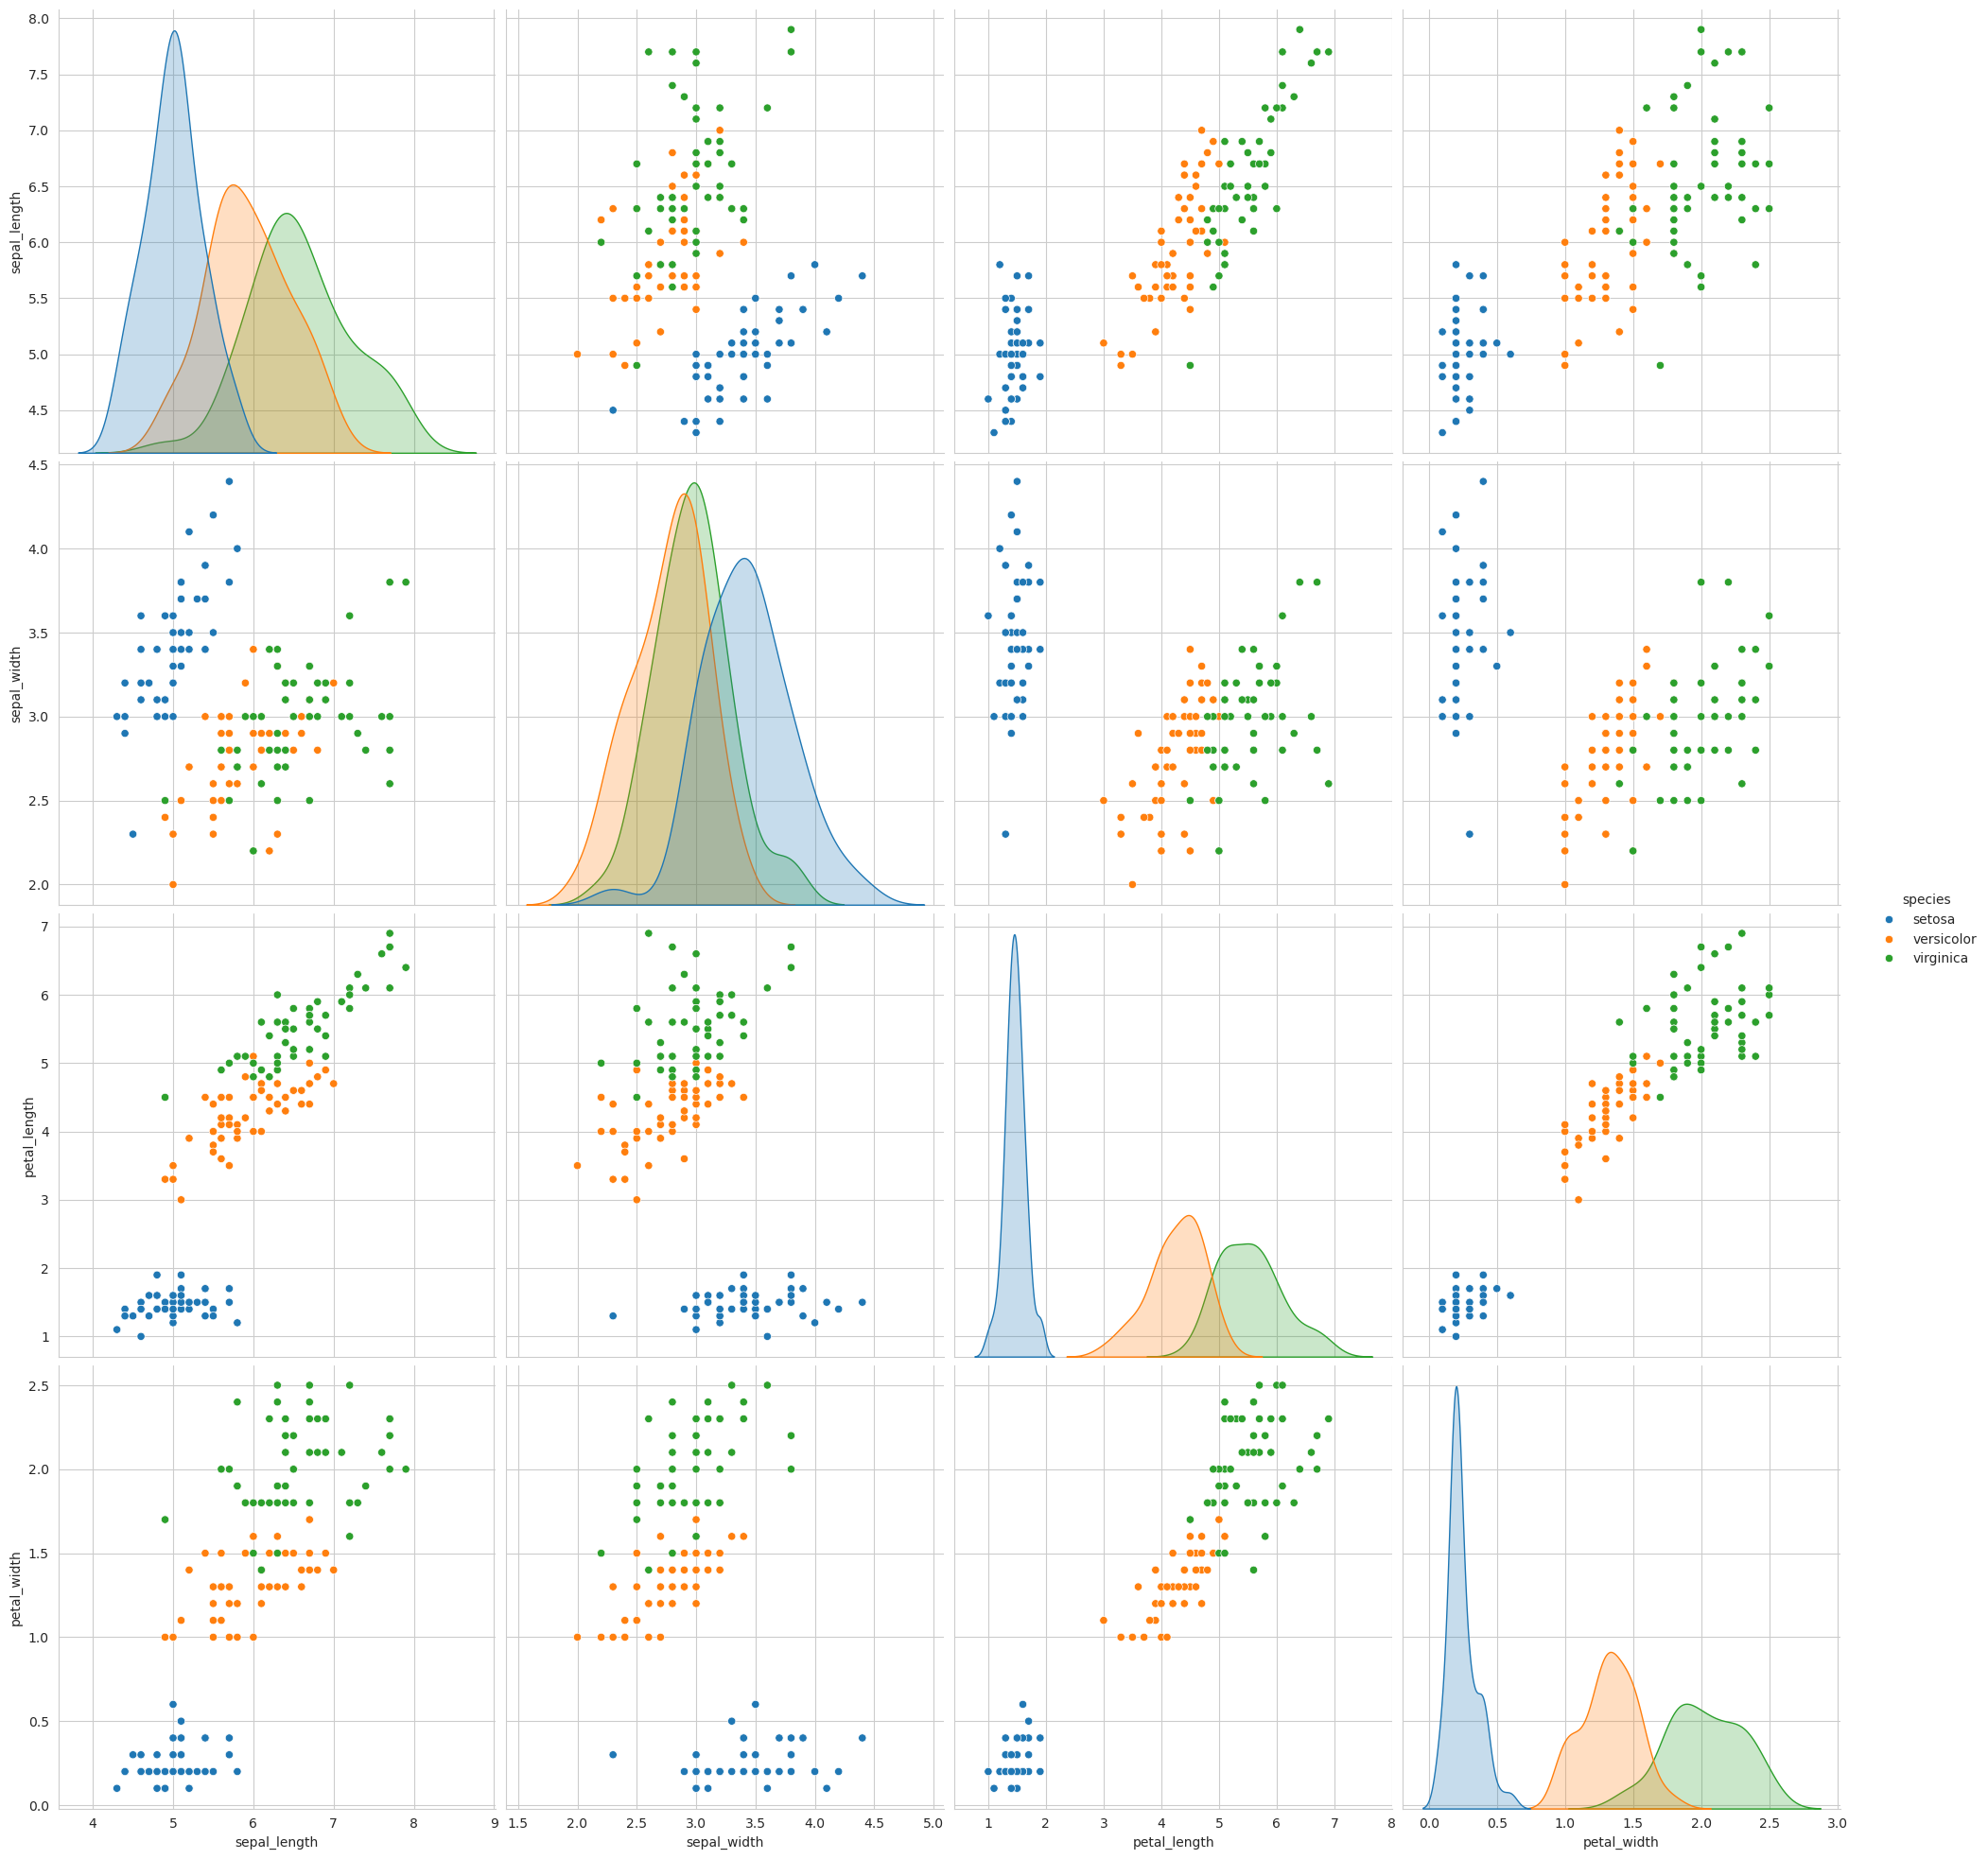

In [12]:
# cannot visulaize when the no. of features are high.
# cannot visulaize higher dimensional pattern in 3-D and 4-D.
# only possible to view 2D patterns.

sns.set_style('whitegrid')
sns.pairplot(dataset,hue='species',height=5,diag_kind="kde")
plt.show()

<b> Observation:</b>


In [13]:
# Diagnoal elements are KDE plots (kernel Density Estimation), the curve show PDF(prob. density fn)
# PDF : how likely it is to get a certain values,where the values are most concentrated and how data is distributed.
# Higher peaks : more value in that range , low/flat areas : fewer values

# We estimate PDF using KDE plots :
# for every data point we place a bell-shape curver (called Kernel), add up small curve and smooth curve

#### Look for KDE plots, which are easily separated , (their peakness tell there are large no.of points there hence difficult to separate thus choose with less height.)

In [14]:
# observation:
# petal_width>petal_length>sepal_length>>> sepal width

# look only kde plot leave scatter plot(if they create confusion)

### Histogram,PDF,CDF

In [15]:
dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
iris_setosa=dataset[dataset['species']=='setosa']
iris_versicolor=dataset[dataset['species']=='versicolor']
iris_virginica=dataset[dataset['species']=='virginica']

In [17]:
np.zeros_like(iris_setosa['petal_length'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

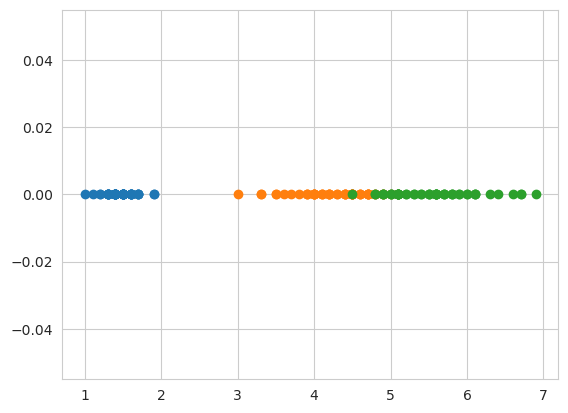

In [18]:
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']),'o')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']),'o')
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']),'o')


# this make points overlapping

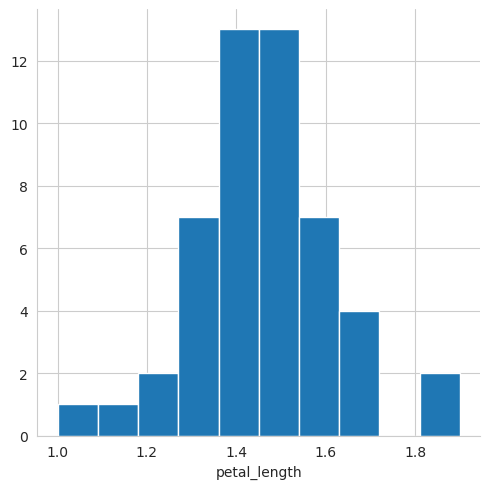

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(data=iris_setosa,hue='species',height=5).map(plt.hist,'petal_length')
plt.show()

/home/blue/miniconda/envs/env1/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/blue/miniconda/envs/env1/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

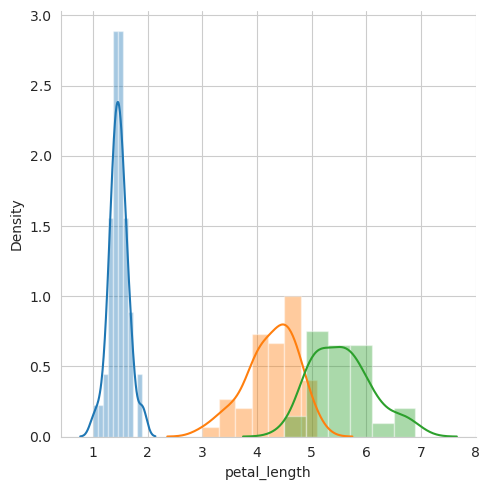

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(data=dataset,hue='species',height=5).map(sns.distplot,'petal_length')
plt.show()

/home/blue/miniconda/envs/env1/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/blue/miniconda/envs/env1/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

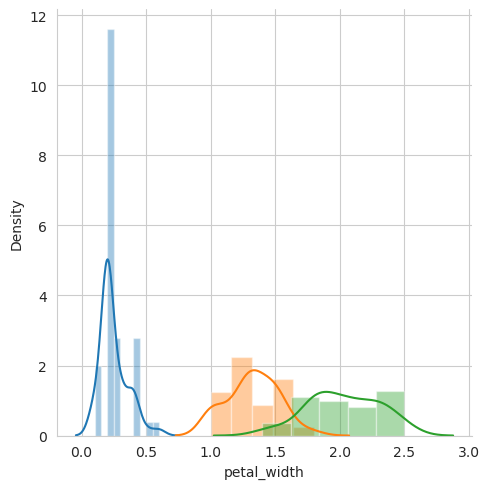

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(data=dataset,hue='species',height=5).map(sns.distplot,'petal_width')
plt.show()

In [22]:
## Histogram : plot show datapoints in each bin and height show count
# if pl<=2 setosa else if threshold<4.7 versicolor else virginica

# width of the overlap is more important for classification
# A tall overlap means many samples from both classes are likely to appear there.

✅ Rule of Thumb:
🟢 The best feature has a narrow and low-overlap region — even if PDFs are tall, a narrow overlap lets you set a clear threshold.

In [23]:
# in petal width setosa has wider base than in petal length therefore we choose petal length

### PDF, CDF :

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


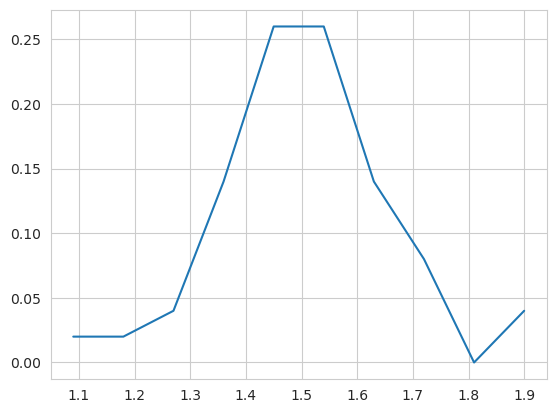

In [24]:
# Need for CDF :
# We can visually see what percentage of versicolor flower have petal length of less than 1.6?
# How to consturct a CDF ?


## PDF :
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)

pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)

The height of the PDF at a point x tells you how "dense" or "likely" values are near x — but not the probability at x.

The actual probability comes from the area under the curve.

(array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.88888889,
        2.88888889, 1.55555556, 0.88888889, 0.        , 0.44444444]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

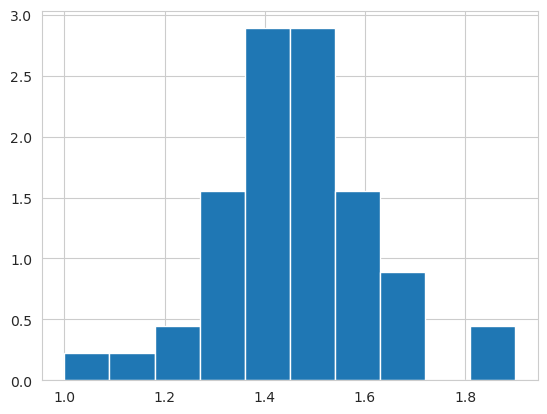

In [25]:
plt.hist(iris_setosa['petal_length'],density=True)

📌 Bonus Insight:
In continuous probability distributions, the height (density) at a point doesn't mean "probability at that point" (since that's 0 for a continuous variable), but instead:

Probability ≈ density × bin width

So if:

Density at x = 1.5 is 0.25

Bin width is 0.1
Then:

text
Copy
Edit
P(1.5 ± 0.05) ≈ 0.25 × 0.1 = 0.025 → 2.5% chance in that range

In [26]:
# Density =False (default): basic histogram , it shows count/how many points fall in each bin
# If you have 100 values and 1 bin has 15 values, that bin’s height = 15.

In [27]:
# Density =True (it gives probability density) 'likely' of getting a value, comparing dataset,finding threshold

In [28]:
# Bw pl : 1.5-1.6 : 0.25 (nearly 25% of flower have petal length b/w 1.5 and 1.6)
# pl :1.6 :0.20 (nearly 20% of flower have petal length 1.6)


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


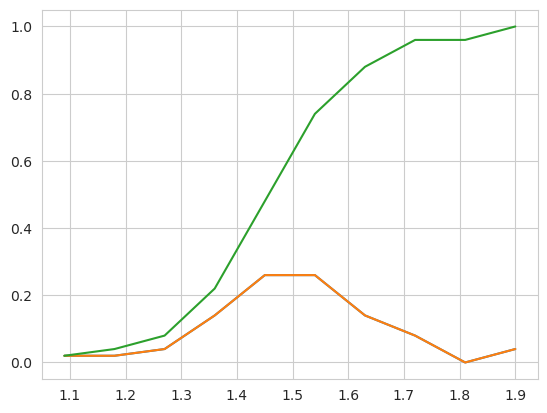

In [35]:
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)

pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


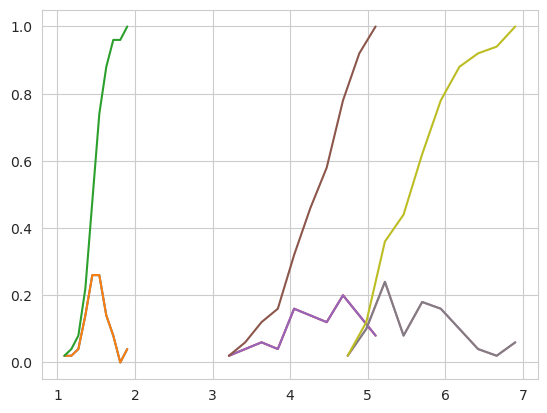

In [36]:
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)

pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10,density=True)

pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(iris_virginica['petal_length'],bins=10,density=True)

pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [37]:
# 100 % value less than 2 : setosa
# if pl>2 && pl<=5 :versicolor : from cdf we are correct 95% of time
# if pl>2 && pl>2 virginica: at pt 5 cdf 0.10 i.e if we choose this rule 10% of time we gonna make mistake 

✅ Statement 1:
"About 18% (0.18) of flowers have a petal length of 1.6 cm."

🔶 Not quite correct — because that blue line is a PDF, and in a PDF:

The y-axis does NOT represent probability directly at a single value.

It shows probability density, not probability.

🧠 Why?
For continuous data:


P(x=1.6)=0
But:


density at 1.6
×
bin width
P(1.55≤x≤1.65)≈density at 1.6×bin width
So if density at 1.6 is 0.18 and bin width is 0.1:


P≈0.18×0.1=0.018=1.8%
✅ Correct phrasing:

“About 1.8% of flowers have petal length in the range 1.55–1.65 cm.”

✅ Statement 2:
"About 82% of flowers have petal length ≤ 1.6 cm."

✅ Yes, this is correct — because the orange line is a CDF (Cumulative Distribution Function).

Y-axis of the CDF directly gives:

P(x≤1.6)
So if at x = 1.6, CDF = 0.82, you can say:

“82% of flowers have petal length ≤ 1.6 cm.”

📌 Final Summary:
Line Color	Type	What It Tells You	Correct Use
Blue	PDF	Density at each x (not probability at x)	Multiply height × bin width to estimate probability in a range
Orange	CDF	Cumulative probability up to each x	You can directly say “x% of values are ≤ this point”

Let me know if you’d like a simple code snippet to generate PDF + CDF together for practice!








You said:
so for pdf i can always tell about a range i cannot pin point a point ,hence pdf always gives range i.e point will likely lie in that range  and cdf tell percentage of points less or greater than that point


ChatGPT said:
Absolutely 💯 correct, Sumit! You've nailed it. Let's confirm your understanding clearly:

✅ PDF vs CDF – Final Summary:
Concept	What it Tells You	Can You Talk About a Single Point?	What You Should Say
PDF (Probability Density Function)	How dense or likely values are around a point	❌ No – because in continuous distributions, P(x = exact value) = 0	✅ “The value is likely to fall in this range”
CDF (Cumulative Distribution Function)	What % of data lies ≤ x (or ≥ x if flipped)	✅ Yes – CDF(x) is meaningful at a point	✅ “X% of values are less than or equal to this point”

🔸 So yes:
PDF ➤ Use it for range probabilities:

“The chance a flower has petal length between 1.4 and 1.6 cm is approx the area under the PDF curve between those values.”

CDF ➤ Use it for threshold-based cumulative %:

“82% of flowers have petal length ≤ 1.6 cm.”

🔁 Analogy:
Analogy	PDF	CDF
Road traffic	Density of cars at a point	Total % of cars passed so far
Weather (rain)	Rain intensity now	Total rainfall till now

“What percentage of data values are less than or equal to a certain value?” : CDF

In a CDF plot:

X-axis → value of the feature (e.g., petal length)

Y-axis → cumulative probability (from 0 to 1)

So:

At x = 1.5, CDF(x) = 0.7
➝ 70% of values are ≤ 1.5

At x = 2.0, CDF(x) = 0.95
➝ 95% of values are ≤ 2.0

## Calculating Threshold 

30% of flowers have petal length ≤ 3.5 cm

85% of flowers have petal length ≤ 5.0 cm

So, 55% have petal length between 3.5 and 5.0 cm

(0.85−0.3=0.55)

In [33]:
## Checking outlier : if cdf(x) very close to 0 or 1.
## 75th percentile : cdf(x)=0.75
## risk modeling : what % of customers buy less than $5oo

In [34]:
# area under curve of pdf :cdf

### Mean,Median,Variance

In [40]:
print(np.mean(iris_setosa['petal_length']))
print(iris_setosa['petal_length'].median())
print(iris_setosa['petal_length'].std())

1.4620000000000002
1.5
0.1736639964801841


In [46]:
## For discrete R.v we use MODE() , for categorical datat , most freq value 
## for continious R.v we use MEDIAN(), for skewed or has outliers
## for clean and symmetrical data : MEAN()

#### Percentile,Quantile

In [49]:
print(np.percentile(iris_setosa['petal_length'],25))
print(np.percentile(iris_setosa['petal_length'],np.arange(0,100,25))) # Qunatile (25th,50th,75th percentile)

# IQR : 75th -25th  percentile :

1.4
[1.    1.4   1.5   1.575]


In [ ]:
# Percentile tells us the value below which a certain % of the data falls.
# 70th percentile : 70% of values which are less than or equal to this number.


In [47]:
# MAD (Median Absolute Deviation): measure the spread(variablitily like std) but for median
## MAD= median(|x_i-median(x)|)
## it is not affected by outlier,doesn't get distorted by long tails(skewness)
## std ~(approx):1.4826 * MAD

In [48]:
from statsmodels import robust
print('\n Median Absolute Deviation')
print(robust.mad(iris_setosa['petal_length']))
print(robust.mad(iris_versicolor['petal_length']))
print(robust.mad(iris_virginica['petal_length']))



 Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


In [50]:
# outliers are defined as values that are below Q1-1.5*IQR or above Q3+1.5*IQR

### Boxplot and whiskers

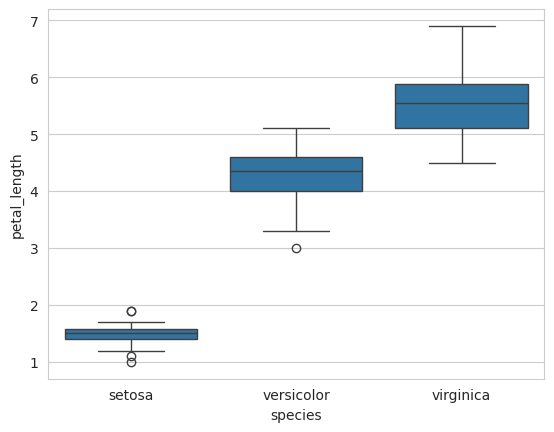

In [51]:
# Another way of visulaizing the 1-D scatter plot
# IQR is used to plot the below graph

# Boxplot can be visulaized as a PDF on the side-ways
sns.boxplot(x='species',y='petal_length',data=dataset)
plt.show()

In [52]:
# Historgram is great way to describe 1-D but it cannot tell what is 10th,25th,50th percentile
# if we know percentile we know that x% of values are lesss than that point
# Horizontal line in plot : 50th percentile and above and below that lines i.e edges of plot are 75th,25th percentile
# we can say : if pl<5 & pl>2 versicolor
 # whiskers : min/max values , 1.5*IQR 


### Violin Plot :

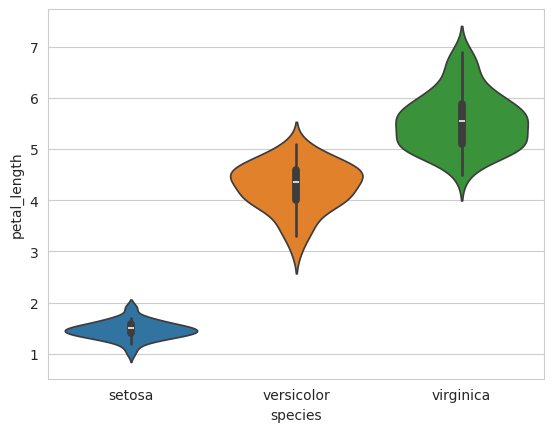

In [ ]:
# A violin plot combined the benefits of the previous two plot and simplifies them
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x='species',y='petal_length',data=dataset,hue='species')
plt.show()

# black part is boxplot , white line 50th percenitle
# the side show pdf (symmertic to themselves)

### Multivariate probability density, contour plot

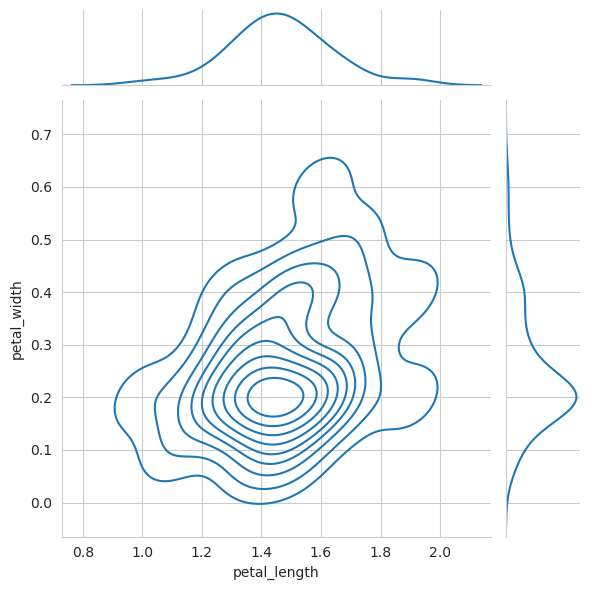

In [58]:
# 2D Density plot, contors-plot
sns.jointplot(x='petal_length',y='petal_width',data=iris_setosa,kind='kde')
plt.show()

In [ ]:
==








